In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import cv2

# image = np.asarray(Image.open('../../../../datasets/intro2CV_dataset/depth/16.png').convert('RGB'))

In [18]:
image = io.imread('../../../../datasets/intro2CV_dataset/depth/65.png')

<class 'numpy.ndarray'>
uint16
(720, 1280)


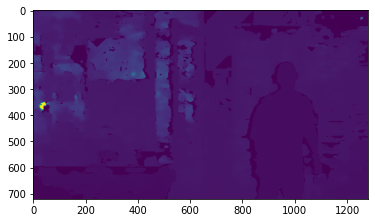

In [19]:
image = np.asarray(image)
print(type(image))
print(image.dtype)
print(image.shape)
plt.imshow(image)

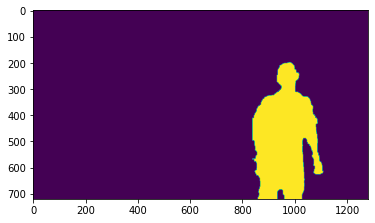

In [20]:
masks = np.zeros([720, 1280, 1], dtype='uint8')
start_row, end_row = 182, 720 # 82, 720
start_column, end_column = 838, 1123 # 490, 897

deviation = 300
kernel = np.ones((10,10),np.uint16)

human_area = image[start_row:end_row, start_column:end_column]
median = np.median(human_area[human_area > 0])
mask = human_area.copy()
mask[mask > median + deviation ] = 0
mask[mask < median - deviation ] = 0
mask[mask > 0] = 1
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = mask.astype(np.uint8)
masks[start_row:end_row, start_column:end_column, 0] = mask
plt.imshow(masks)

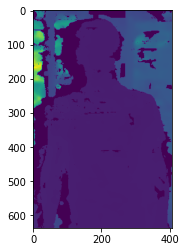

In [8]:
human_area = image[start_row:end_row, start_column:end_column]
plt.imshow(human_area)

1345.0


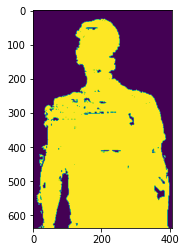

In [9]:
# Apply median filter

median = np.median(human_area[human_area > 0])
print(median)
mask = human_area.copy()
mask[mask > median+300 ] = 0
mask[mask < median-300 ] = 0
mask[mask > 0] = 1

plt.imshow(mask)

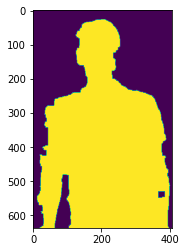

In [12]:
kernel = np.ones((10,10),np.uint16)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

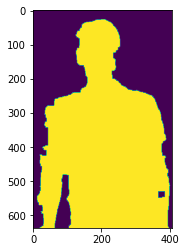

In [14]:
new = closing.astype(np.uint8)
plt.imshow(new)

[[     0 259666]]


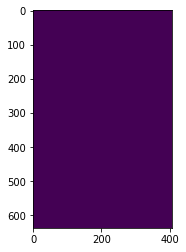

In [13]:
(unique, counts) = np.unique(human_area, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
human_area[human_area != frequencies[0][0]] = 0
plt.imshow(human_area)

In [ ]:
<xmin>490</xmin>
<ymin>82</ymin>
<xmax>897</xmax>
<ymax>720</ymax>

<width>1280</width>
<height>720</height>
